## Final Project Submission

Please fill out:
* Student name: SAMUEL NGANGA GICHANGA
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL:


## Business Problem
Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don't know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Main aims and objectives
1. To determine which genres were most profitable.
2. To determine which release months were most profitable.
3. To determine what size of the movies were the most popular.
4. To determine what size of the movies were the most profitable.



## To acheive the aims and objectives will use the following data sets.
After carefully inspecting all the datasets, I decided to use three data sets as listed below;

1. imdb.title.basics.csv.gz
2. imdb.title.ratings.csv.gz
3. tn.movie_budgets.csv.gz


## Loading all necessary packages and libraries.

In [292]:
#imports of packages required in the whole project. 
import gzip as gz 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import calendar
from matplotlib.ticker import FuncFormatter 
%matplotlib inline

## Data preparation and understanding

### imdb.title.basics.csv

In [293]:
#Loading imdb.title.basics.csv
df_tbasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')
df_tbasics


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


The dataframe "title.basics.csv" is a two dimensional data set with 146144 rows x 6 columns. The columns contain the information about the movie as below;

1. tconst - alphanumeric unique identifier of the title.
2. primary_title - the more popular title/ the title used by the filmmakers on promotional materials at the point of release.
3. original_title - original title, in the original language.
4. start_year - the release year of a given title.
5. runtime_minutes - primary runtime of the title in minutes.
6. genres - includes upto the three genres associated with the title.



In [294]:
#getting more information of the columns in the dataframe.
df_tbasics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


As displayed;

1. tconst,primary_title,original_title and genres contain object datatypes, meaning they are strings or they include strings.
2. start_year contain int64 datatype, meaning it contains integer values.
3. runtime_minutes contain float64 data type, meaning it contains numerical data which is in decimals.
4. original_title has 21 missing values.
5. runtime_minutes has 31739 missing values.
6. genres has 5408 missing values.


In [295]:
#Describe the genres for the movie titles.
df_tbasics['genres'].describe()

count          140736
unique           1085
top       Documentary
freq            32185
Name: genres, dtype: object

As described:
we can confirm that the genres has 5408 missing values and 1085 unique values.

In [296]:
#exploring the dataframe according to the unique values of the genres.
df_tbasics['genres'].value_counts()

Documentary                   32185
Drama                         21486
Comedy                         9177
Horror                         4372
Comedy,Drama                   3519
                              ...  
Adventure,Music,Mystery           1
Documentary,Horror,Romance        1
Sport,Thriller                    1
Comedy,Sport,Western              1
Adventure,History,War             1
Name: genres, Length: 1085, dtype: int64

In [297]:
#Because we intend to combine the title basics with the ratings, we will set the index to tconst.
df_tbasics.set_index('tconst', inplace=True)

In [298]:
#Confirm if it is set.
df_tbasics

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


### imdb.title.ratings.csv

In [299]:
#Loading imdb.title.ratings.csv
df_tratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')
df_tratings


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


The dataframe "title.ratings.csv" is a two dimensional data set with 73856 rows x 3 columns. The columns contain the information about the movie as below;

1. tconst - alphanumeric unique identifier of the title.
2. averagerating - the average of the ratings per title.
3. numvotes - Thwe number of votes casted for diffrent ratings per title.



In [300]:
#getting more information of the columns in the dataframe.
df_tratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


As displayed;

1. tconst contain object datatypes, meaning they are strings or they include strings.
2. numvotes int64 datatype, meaning it contains integer values.
3. averagerating contain float64 data type, meaning it contains numerical data which is in decimals.

There are no missing values in the dataset.


In [301]:
#we now describe the data with the descriptive statistics.
df_tratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


Above output is the summary statistics of averagerating and numvotes respective to the columns. The summary statistics include; count, mean, standard deviation, the minimum value, the lower quatile, median, upper quatile and the minimum values of average rating and numvotes respectively.

1. The mean of average rating is 6.332729 and the mean of numvotes is 3.523662 approximately.
2. Standard deviation is 1.474 for averagerating and 3.52366 for numvotes meaning data is not widely spread in a big range for both columns.
3. The minimum value for average rating is 1 meaning the title that got the lowest rating had 1 rating. The minimum value for numvotes is 5 meaning the title that had the least num of votes had 5 votes.
4. The maximum value for averagerating is 10 meaning the title that had the best rating had 10 rating, and the maximum value for numvotes is 1.841066 meaning the highest number of votes casted for a given title was 1.841066e+06



### tn.movie_budgets.csv

In [302]:
#Loading tn.movie_budgets.csv
df_mbudgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip', index_col=0)
df_mbudgets


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


The dataframe "tn.movie_budgets.csv" is a two dimensional data set with 5782 rows x 5 columns. The columns contain the information about the movie as below;

1. id - a unique identifier for each movie.
2. release date - the date that a given movie was released.
3. movie - the name of the movie.
4. production_budget - the amount of money budgeted for production in dollars.
5. domestic_gross - the domestic gross revenue of the movie in dollars.
6. worldwide_gross - the worldwide gross revenue of the movie in dollars.
 


In [303]:
#getting more information of the columns in the dataframe.
df_mbudgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


As displayed, at this point, all the columns contain object datatypes, meaning they are strings or they include strings.

There are no missing values.


In [304]:
# In order to retrieve the summary statistics,
# we convert production budget, domestic_gross, and worldwide_gross to float.
df_mbudgets['production_budget'] = df_mbudgets['production_budget'].replace('[\$,]', '',regex=True).astype(float)
df_mbudgets['domestic_gross']=df_mbudgets['domestic_gross'].replace('[\$,]', '',regex=True).astype(float) 
df_mbudgets['worldwide_gross']=df_mbudgets['worldwide_gross'].replace('[\$,]','', regex=True).astype(float)
df_mbudgets


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [305]:
#Now we convert the reLease_date coLumn from object to date data type. 
df_mbudgets["release_date"]=pd.to_datetime(df_mbudgets['release_date'])
df_mbudgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00
79,1999-04-02,Following,6000.0,48482.0,2.404950e+05
80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [306]:
#we now check the info again to notice the changes I made.
df_mbudgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 271.0+ KB


It easy to note that, previously we had all columns as object data types but now we have changed release_date from object data type to datetime and production_budget, domestic_gross, worldwide_gross to float64 data types.

# Data Analysis.

In [307]:
#merging necessary dataframes
df_tbasics_tratings = pd.merge(df_tbasics, df_tratings, on='tconst', how='inner')
df_tbasics_tratings


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,NaN,6.6,5


In [308]:
# I will now group by genre and find the average rating for each genre. 
df_gbgenre=df_tbasics_tratings.groupby('genres').mean().reset_index()
df_gbgenre

,genres,start_year,runtime_minutes,averagerating,numvotes
0,Action,2014.271706,103.201110,5.757712,336.115424
1,"Action,Adult,Comedy",2014.000000,71.000000,4.650000,18.000000
2,"Action,Adventure",2014.205882,105.354839,5.223529,1603.102941
3,"Action,Adventure,Animation",2014.676647,92.981013,6.562874,21380.497006
4,"Action,Adventure,Biography",2015.047619,105.500000,7.061905,47604.809524
...,...,...,...,...,...
918,Thriller,2014.702251,94.880435,5.704244,283.320900
919,"Thriller,War",2013.250000,88.750000,5.650000,1791.500000
920,"Thriller,Western",2013.250000,95.000000,7.150000,3322.000000
921,War,2014.595745,95.600000,6.134043,117.765957


After grouping by genres and finding the mean, we now have 923 rows x 5 columns; Every row contain information of a diffrent genre, we have 923 genres. The five rows are the rows that contained intenger and float data types that was possible to find the average according to genre.

In [309]:
df_mbudgets.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### determine which genres were most profitable.

#### profit

In [310]:
# Creating a new coLumn for profit in df_mbudgets data frame.
df_mbudgets['profit']=df_mbudgets['worldwide_gross']-df_mbudgets['production_budget']
df_mbudgets


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
id,,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08
...,...,...,...,...,...,...
78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03
79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,2.344950e+05
80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03


We now have a new column created for the profit realized but no consideration of other costs made.

To determine which genre was most proftable, we merge two datasets.

In [311]:
#Merge df_mbudgets and df_tbasics_tratings
df_mbudgets_df_tbasics_tratings=pd.merge(df_mbudgets,df_tbasics_tratings, left_on='movie', right_on='original_title') 
df_mbudgets_df_tbasics_tratings


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,-1.500000e+04,tt3973612,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama,7.5,85
2634,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,8.459600e+04,tt1872026,Cure,Cure,2011,93.0,Drama,4.9,11
2635,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4.416000e+03,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",6.4,1436
2636,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43


In [312]:
#Knowing more on the new dataset.
df_mbudgets_df_tbasics_tratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2638 entries, 0 to 2637
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       2638 non-null   datetime64[ns]
 1   movie              2638 non-null   object        
 2   production_budget  2638 non-null   float64       
 3   domestic_gross     2638 non-null   float64       
 4   worldwide_gross    2638 non-null   float64       
 5   profit             2638 non-null   float64       
 6   tconst             2638 non-null   object        
 7   primary_title      2638 non-null   object        
 8   original_title     2638 non-null   object        
 9   start_year         2638 non-null   int64         
 10  runtime_minutes    2532 non-null   float64       
 11  genres             2633 non-null   object        
 12  averagerating      2638 non-null   float64       
 13  numvotes           2638 non-null   int64         
dtypes: datet

#### Data cleaning

We are interested in three columns, production budget, wolrdwide_gross and genre, We have missing values in the genres so we take care of that.

In [313]:
#draping rows with missing values in the column genre.
df_mbudgets_df_tbasics_tratings=df_mbudgets_df_tbasics_tratings.dropna(subset=['genres'])

In [314]:
#returning specified value from the dataframe in order to split it.
x=df_mbudgets_df_tbasics_tratings.loc[0,'genres']
x

'Action,Adventure,Fantasy'

In [315]:
#splitting the value to multiple genres
x.split( ',')

['Action', 'Adventure', 'Fantasy']

In [316]:
#spiting the name and picking the first name represent the cell 
df_mbudgets_df_tbasics_tratings['GENRES']=df_mbudgets_df_tbasics_tratings['genres'].apply(lambda x: x.split(',')) 
df_mbudgets_df_tbasics_tratings

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,GENRES
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,"[Action, Adventure, Fantasy]"
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,"[Action, Adventure, Sci-Fi]"
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,"[Action, Adventure, Sci-Fi]"
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,"[Action, Adventure, Sci-Fi]"
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135,"[Action, Adventure, Fantasy]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,2014-12-31,Stories of Our Lives,15000.0,0.0,0.000000e+00,-1.500000e+04,tt3973612,Stories of Our Lives,Stories of Our Lives,2014,60.0,Drama,7.5,85,[Drama]
2634,2001-07-06,Cure,10000.0,94596.0,9.459600e+04,8.459600e+04,tt1872026,Cure,Cure,2011,93.0,Drama,4.9,11,[Drama]
2635,2012-01-13,Newlyweds,9000.0,4584.0,4.584000e+03,-4.416000e+03,tt1880418,Newlyweds,Newlyweds,2011,95.0,"Comedy,Drama",6.4,1436,"[Comedy, Drama]"
2636,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,tt7837402,Red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller",5.6,43,"[Horror, Sci-Fi, Thriller]"


##### Convert all the big values to monetary names.

In [317]:
# funtion to convert the values to monetary name while plating.
def millions(x,pos):
    return "{:1.1f}M".format(x* 1e-6)
formatter=FuncFormatter(millions)

def thousands(x,pos):
    return "{:1.1f}k".format(x* 1e-3)
formatterl = FuncFormatter(thousands)

def percent(x, pos):
    return "{:1.lf}%".format(x * 1e-1) 
formatter2 = FuncFormatter(percent)


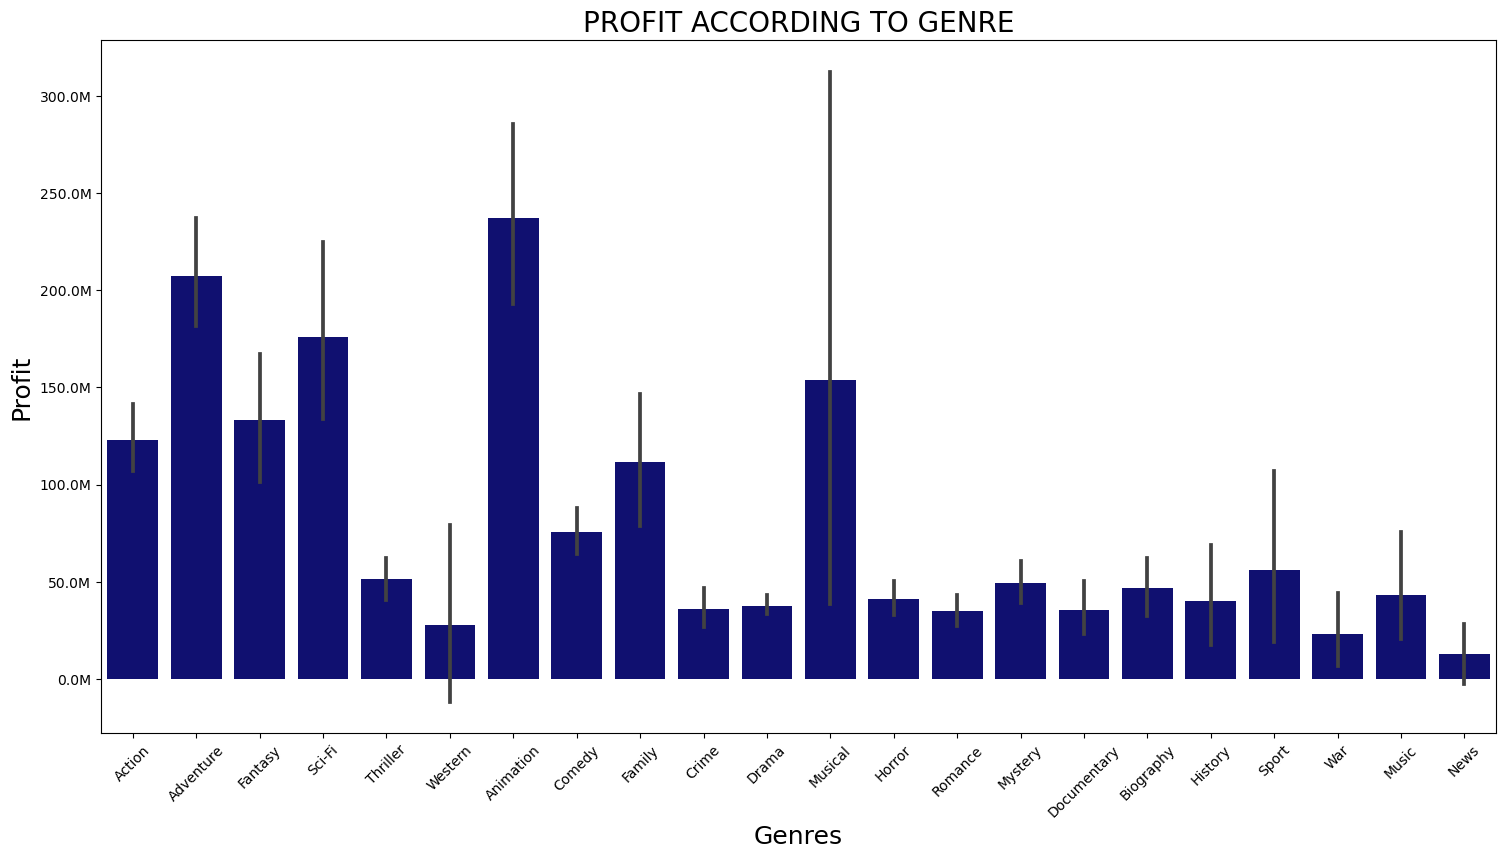

In [318]:
# Plot of genres and profit.
fig,ax= plt.subplots(figsize=(18,9))
sns.barplot(x='GENRES', y='profit', data=df_mbudgets_df_tbasics_tratings.explode('GENRES'), ax=ax, color='#000080')
ax.tick_params(axis='x', labelrotation=45) 
plt.ylabel('Profit', fontsize=18) 
plt.xlabel('Genres', fontsize=18) 
ax.set_title("PROFIT ACCORDING TO GENRE", fontsize=20) 
ax.yaxis.set_major_formatter(formatter)


### Determine which release months were most profitable.

In [319]:
#Adding one more coLumn of the release months 
df_mbudgets['release_months']=df_mbudgets['release_date'].apply(lambda    x:    x.month)
df_mbudgets

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,release_months
id,,,,,,,
1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,12
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,5
3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,6
4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,5
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,12
...,...,...,...,...,...,...,...
78,2018-12-31,Red 11,7000.0,0.0,0.000000e+00,-7.000000e+03,12
79,1999-04-02,Following,6000.0,48482.0,2.404950e+05,2.344950e+05,4
80,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03,-3.662000e+03,7


Now the new column for release date is created

In [320]:
df_gbrelease_months=df_mbudgets.groupby('release_months').mean().reset_index()
df_gbrelease_months

,release_months,production_budget,domestic_gross,worldwide_gross,profit
0,1,2.084349e+07,2.394962e+07,4.656382e+07,2.572033e+07
1,2,2.804642e+07,3.541465e+07,7.154453e+07,4.349811e+07
2,3,3.078208e+07,3.857299e+07,8.063337e+07,4.985129e+07
3,4,2.380283e+07,2.732840e+07,5.992026e+07,3.611743e+07
4,5,4.713520e+07,6.669795e+07,1.622680e+08,1.151328e+08
5,6,4.309912e+07,6.582791e+07,1.425230e+08,9.942391e+07
6,7,4.254616e+07,6.072804e+07,1.409636e+08,9.841746e+07
7,8,2.555609e+07,3.216821e+07,6.097841e+07,3.542232e+07
8,9,2.181290e+07,2.314989e+07,4.669369e+07,2.488078e+07
9,10,2.039266e+07,2.442350e+07,4.946456e+07,2.907190e+07


Now we have a dataframe with 12 rows that represent the month of release and the other columns represent the average for each month.

In [321]:
#Now we change the release month from int to string abreviation of the month name. 
df_gbrelease_months['release_months'] = df_gbrelease_months['release_months'].apply(lambda x: calendar.month_abbr[x])
df_gbrelease_months

,release_months,production_budget,domestic_gross,worldwide_gross,profit
0,Jan,2.084349e+07,2.394962e+07,4.656382e+07,2.572033e+07
1,Feb,2.804642e+07,3.541465e+07,7.154453e+07,4.349811e+07
2,Mar,3.078208e+07,3.857299e+07,8.063337e+07,4.985129e+07
3,Apr,2.380283e+07,2.732840e+07,5.992026e+07,3.611743e+07
4,May,4.713520e+07,6.669795e+07,1.622680e+08,1.151328e+08
5,Jun,4.309912e+07,6.582791e+07,1.425230e+08,9.942391e+07
6,Jul,4.254616e+07,6.072804e+07,1.409636e+08,9.841746e+07
7,Aug,2.555609e+07,3.216821e+07,6.097841e+07,3.542232e+07
8,Sep,2.181290e+07,2.314989e+07,4.669369e+07,2.488078e+07
9,Oct,2.039266e+07,2.442350e+07,4.946456e+07,2.907190e+07


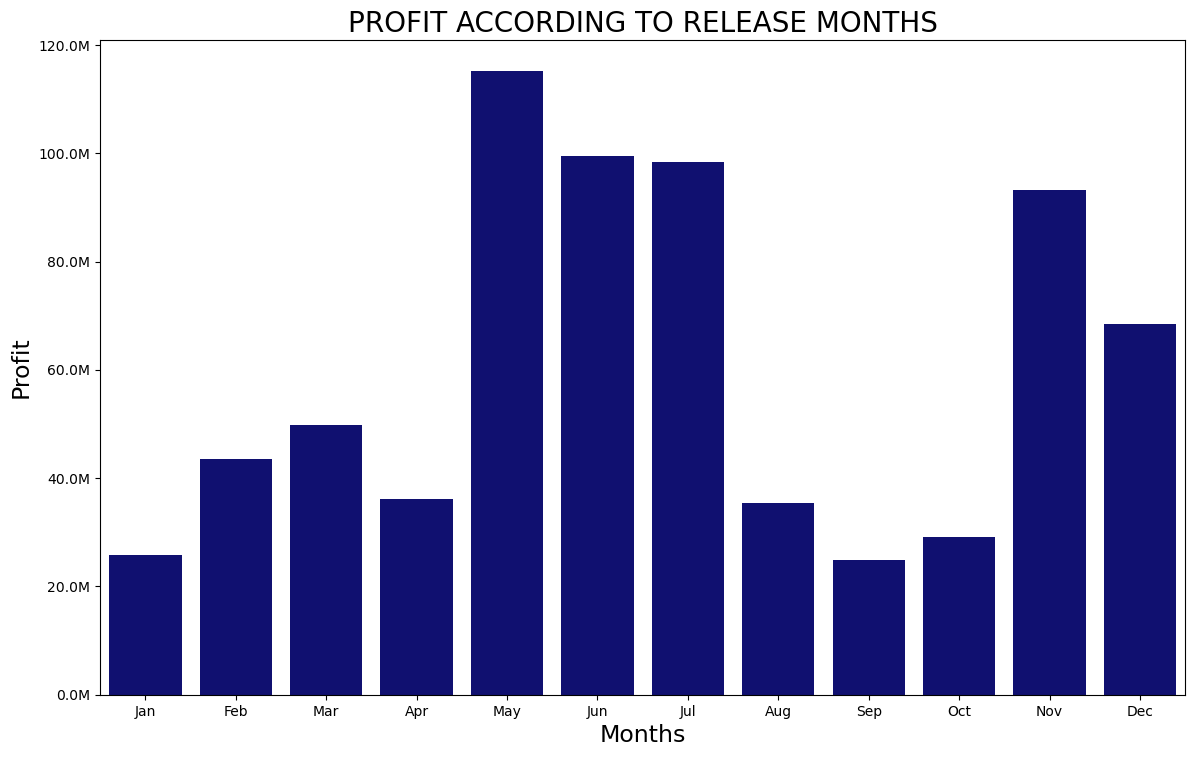

In [322]:
#plot profit and reLeLase months
fig, ax=plt.subplots(figsize=(14,8.5))
sns.barplot(x='release_months', y='profit', data=df_gbrelease_months, ax=ax,color='#000080') 
plt.title('PROFIT ACCORDING TO RELEASE MONTHS', fontsize=20)
plt.ylabel('Profit', fontsize=17) 
plt.xlabel('Months', fontsize=17) 
ax.yaxis.set_major_formatter(formatter)


#### What movie size was the most popular.

In [323]:
#ceating a new column Movie_length.
df_mbudgets_df_tbasics_tratings['Movie_size']=df_mbudgets_df_tbasics_tratings['runtime_minutes'].map(lambda x:"Long (150 mins or more)" 
                                                                                                     if x >= 150 else("Short (100 mins or less)" if x<=100 else("Medium (between 100mins and 150mins)")))
df_mbudgets_df_tbasics_tratings.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,GENRES,Movie_size
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,"[Action, Adventure, Fantasy]",Medium (between 100mins and 150mins)
1,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",6.0,24451,"[Action, Adventure, Sci-Fi]",Medium (between 100mins and 150mins)
2,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,"[Action, Adventure, Sci-Fi]",Medium (between 100mins and 150mins)
3,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,"[Action, Adventure, Sci-Fi]",Medium (between 100mins and 150mins)
4,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,3.559452e+08,tt0974015,Justice League,Justice League,2017,120.0,"Action,Adventure,Fantasy",6.5,329135,"[Action, Adventure, Fantasy]",Medium (between 100mins and 150mins)


In [324]:
#taking a value count of the column created (Movie_size)
df_mbudgets_df_tbasics_tratings['Movie_size'].value_counts()

Medium (between 100mins and 150mins)    1324
Short (100 mins or less)                1245
Long (150 mins or more)                   64
Name: Movie_size, dtype: int64

So we have;

1. 1324 Medium (100 to 150 minutes) movies.
2. 1245 Short (100 mins or less) movies.
3. 64 Long (150 minutes or more) movies.


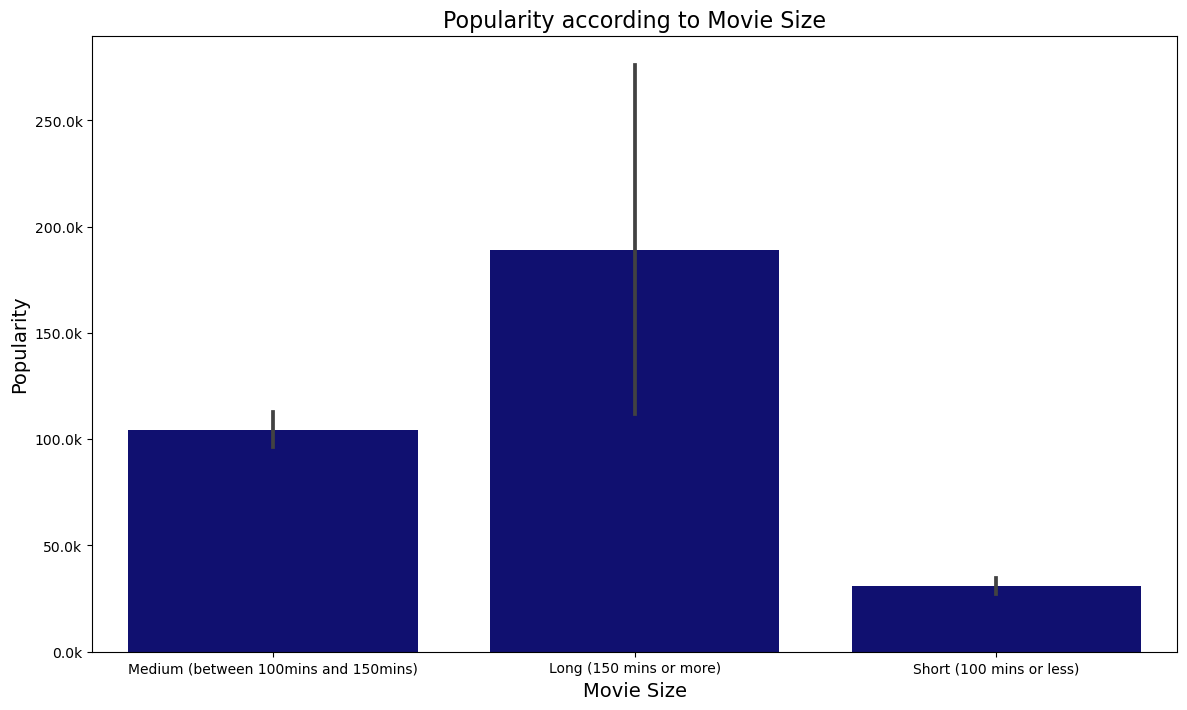

In [325]:
fig, ax= plt.subplots(figsize=(14, 8))
sns.barplot(x="Movie_size", y="numvotes",ax = ax, data=df_mbudgets_df_tbasics_tratings,color="#000080")
ax.set_title("Popularity according to Movie Size", fontsize=16)
ax.set_xlabel("Movie Size", fontsize=14)
ax.set_ylabel("Popularity", fontsize=14)

ax.yaxis.set_major_formatter(formatterl)


#### What movie size was the most profitable.

In [329]:
#grouping by movie size and getting the profit averages.
df_Msize=df_mbudgets_df_tbasics_tratings.groupby('Movie_size').mean('profit').reset_index()
df_Msize


,Movie_size,production_budget,domestic_gross,worldwide_gross,profit,start_year,runtime_minutes,averagerating,numvotes
0,Long (150 mins or more),6.188047e+07,6.310995e+07,1.956936e+08,1.338131e+08,2014.250000,161.656250,7.043750,189238.593750
1,Medium (between 100mins and 150mins),4.328350e+07,5.399035e+07,1.314044e+08,8.812086e+07,2014.043051,115.739558,6.483988,104512.395015
2,Short (100 mins or less),2.408264e+07,3.030011e+07,6.933736e+07,4.525472e+07,2013.708434,87.611245,5.938635,30894.187149


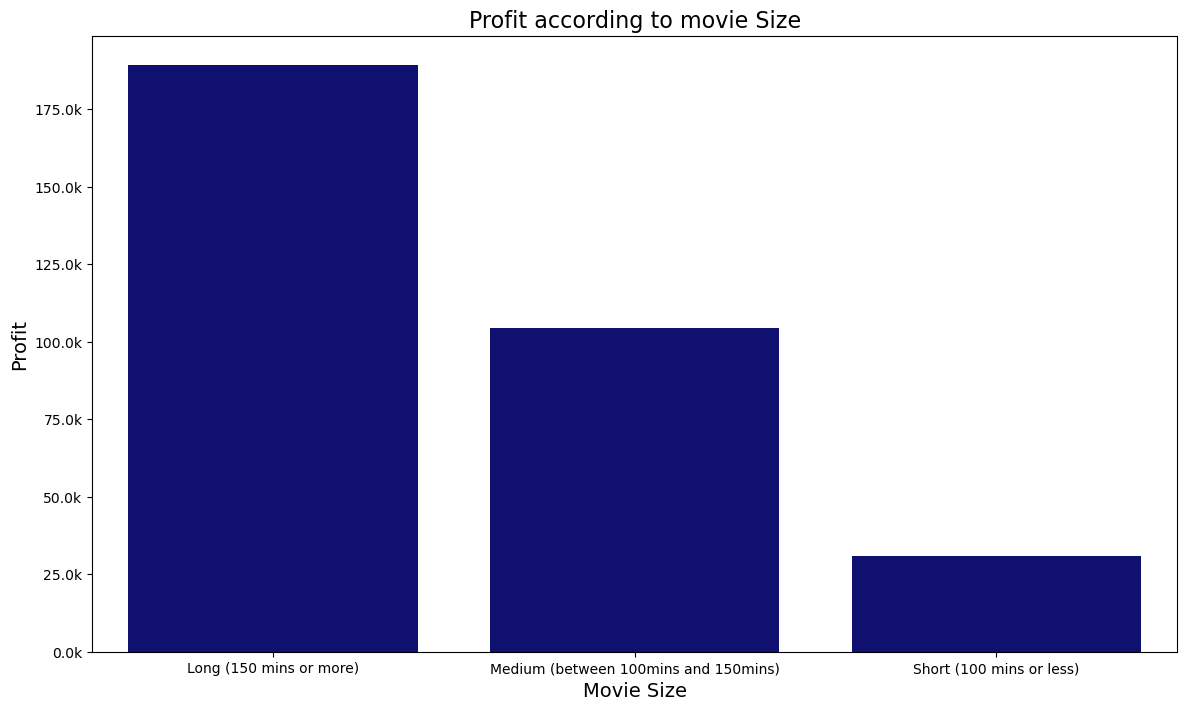

In [328]:
#pLot profit and movie size
fig, ax= plt.subplots(figsize=(14, 8))

sns.barplot(x="Movie_size", y="numvotes",ax = ax, data=df_Msize,color="#000080")

ax.set_title("Profit according to movie Size", fontsize=16)
ax.set_xlabel("Movie Size", fontsize=14) 
ax.set_ylabel("Profit", fontsize=14)

ax.yaxis.set_major_formatter(formatterl)


## conclusion;
1. According to the analysis of the data, animation, adventure and Sci-Fi genres are the leading genres in profit margin. Hence Microsoft should consider to produce movies with the three genres (animation, adventure and Sci-Fi) in the new movie studio.
2. According to the analysis , May, june, july were the most profitable release months respectively, hence Microsoft should consider to make the new release of the movies in the months of May, june, july since they are the most profitable months.
3. According to the results of the analysis, the long movies (150 minutes and above) were that most popular and most profitable hence Microsoft should consider producing movies that are 150 minutes or more long.
